# Top Repositories in Github Topics

In part1, I scraped out the static page which has only 20 trending topics. But now, I figured out how to scrape remaining topics that are not on the home page.
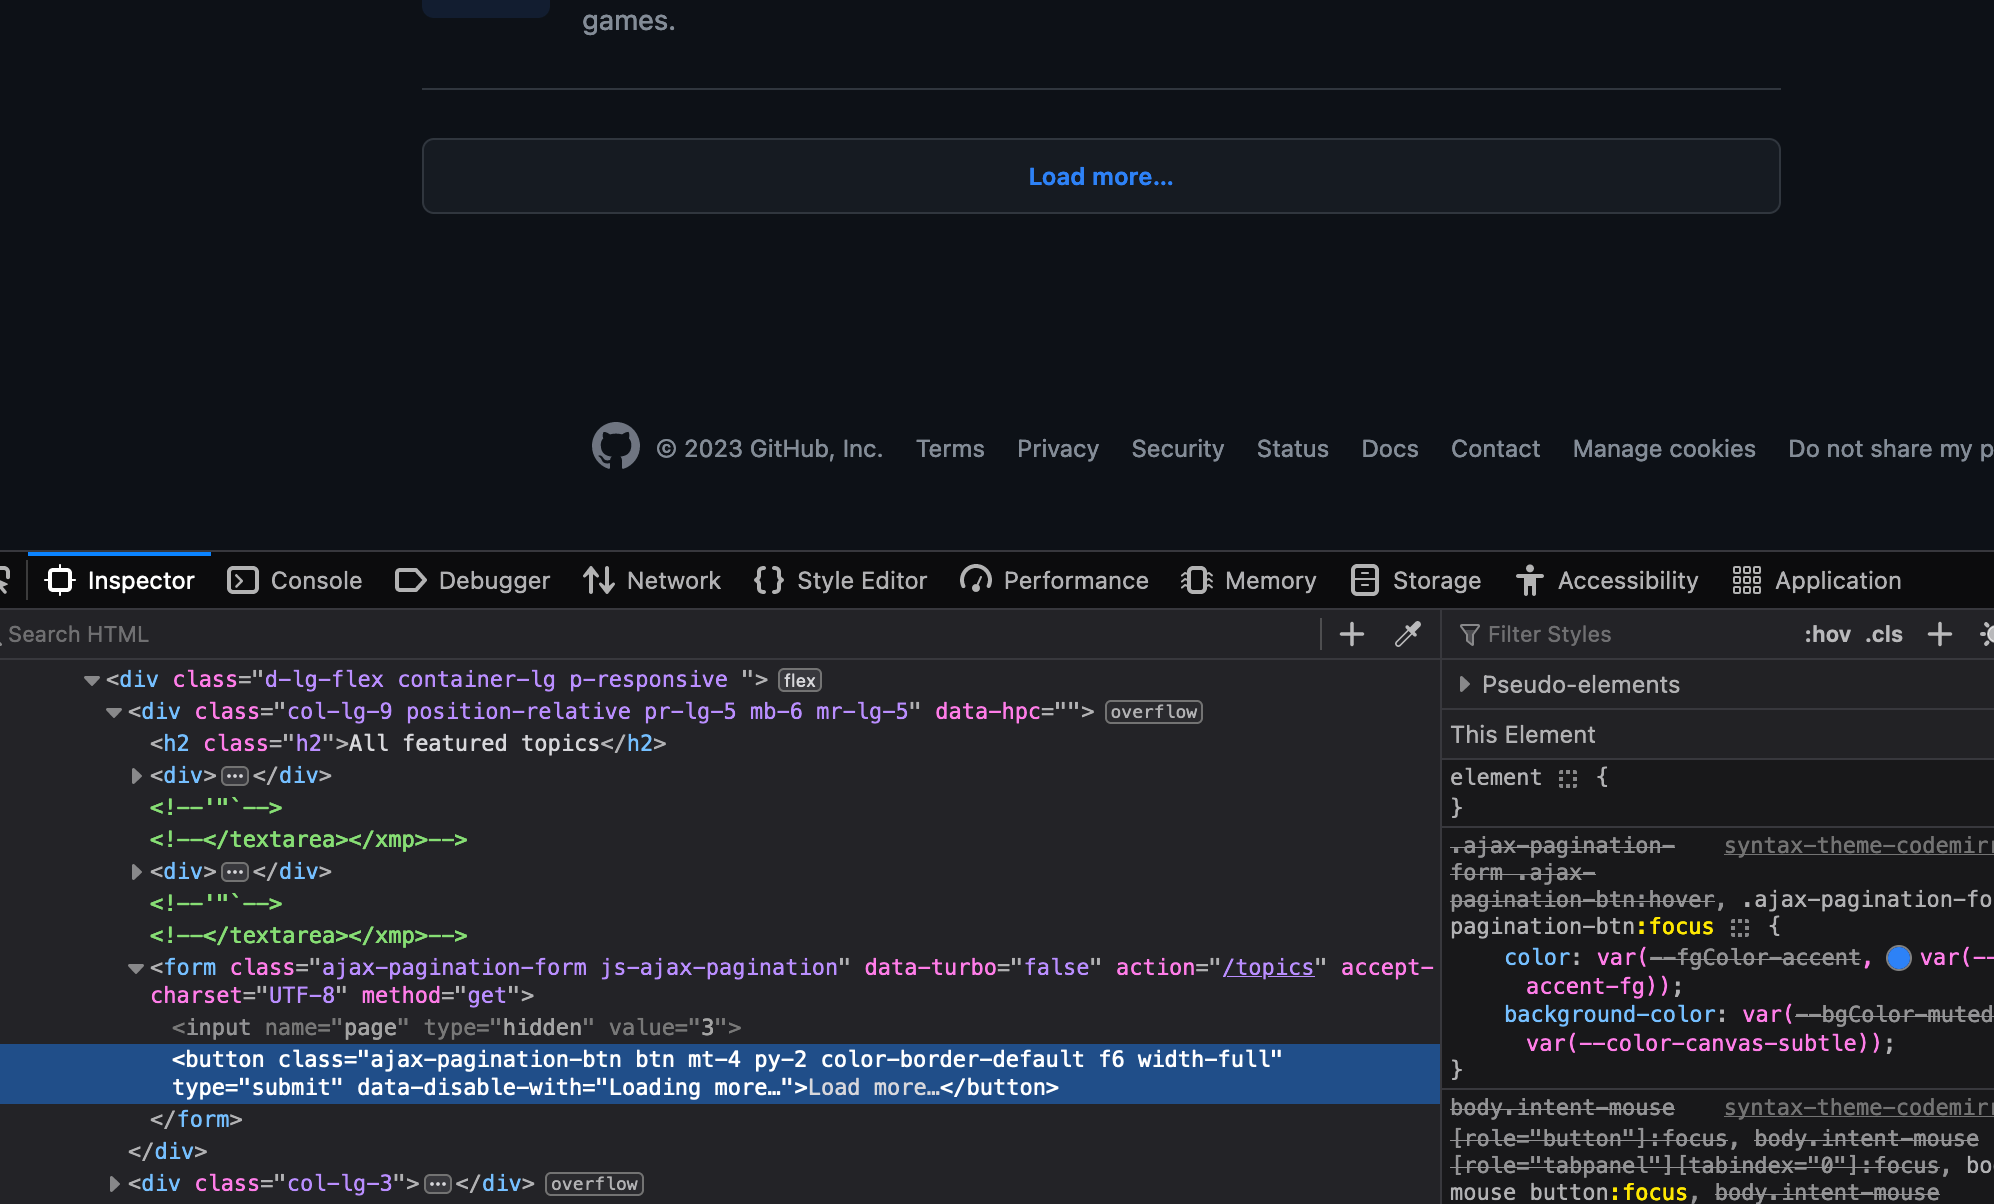

apparently the loadmore button has hidden page value. Now if you append it to the original link with a question mark (?) and then placeholder 'page=' and then the number 
```
https://github.com/topics/?page=1
```
Im gonna repeat this until there is a request.status_code !=200

- Im gonna repeat the same thing for extracting the repository names for each github trending topic

## Project Outline
- Website to scrape - https://github.com/topics
- I will scrape the list of topics from the main page and for each topic, I will scrape topic title, topic URL and topic description
- For each topic, I will scrape all the repositories along with their repository name, username, description, no of stars, tags, URL, last updated.

 | topic |repo_name | repo_username | repo_desc | stars | repo_url | tags |
|-------|-------|------------|-------|------------|-------|------------|
|3d| three.js|mrdoob|JavaScript 3D Library|96.6k|https://github.com/mrdoob/three.js | javascript svg webgl html5 canvas augmented-reality webaudio virtual-reality webgl2 3d webgpu webxr | JavaScript|


In [52]:
# Install Libraries 
!pip install requests
!pip install bs4

In [53]:
import requests
import pandas as pd
from bs4 import BeautifulSoup as bs

In [54]:
page_n0 = 1
topics_url = 'https://github.com/topics/?page='+ str(page_n0)
# requests.get(topics_url).status_code 
# topics_url

HTTP response status codes indicate whether a specific HTTP request has been successfully completed. Responses are grouped in five classes:

- Informational responses (100 – 199)
- Successful responses (200 – 299)
- Redirection messages (300 – 399)
- Client error responses (400 – 499)
- Server error responses (500 – 599)


In [55]:
# Creating an empty dataframe with column names initialized
columns = ['topic_title', 'description', 'url']
trending_topics = pd.DataFrame(columns= columns)

In [56]:
def check_url(url):
    if requests.get(url).status_code == 200:
        return True
    else:
        return False


In [57]:
while check_url(topics_url):
    response = requests.get(topics_url)
    page_contents = response.text
    soup = bs(page_contents, 'html.parser')

    print('Extracting Page-', page_n0)

    p_tags = soup.find_all('p')
    topic_title_tags = soup.find_all('p', {'class':'f3 lh-condensed mb-0 mt-1 Link--primary' })
    topic_desc_tags = soup.find_all('p', {'class':'f5 color-fg-muted mb-0 mt-1' })
    topic_url_tags =  soup.find_all('a', {'class':"no-underline flex-1 d-flex flex-column" })


    topic_titles = []
    for tag in topic_title_tags:
        topic_titles.append(tag.text)
    
    topic_description = []
    for tag in topic_desc_tags:
        topic_description.append(tag.text.strip())

    
    base_url = 'https://github.com'
    topic_urls = []
    for tag in topic_url_tags:
        topic_urls.append(base_url + tag['href'])

    topics_dict = {'topic_title': topic_titles, 'description': topic_description, 'url': topic_urls}
    temp_df = pd.DataFrame(topics_dict)
    trending_topics = pd.concat([trending_topics, temp_df])

    
    page_n0 += 1
    topics_url = 'https://github.com/topics/?page=' + str(page_n0)
    # print(trending_topics)
    # break

display("Numeber of Trending Topics", len(trending_topics))


Extracting Page- 1
Extracting Page- 2
Extracting Page- 3
Extracting Page- 4
Extracting Page- 5
Extracting Page- 6
Extracting Page- 7
Extracting Page- 8
Extracting Page- 9
Extracting Page- 10
Extracting Page- 11
Extracting Page- 12
Extracting Page- 13
Extracting Page- 14
Extracting Page- 15
Extracting Page- 16
Extracting Page- 17
Extracting Page- 18
Extracting Page- 19
Extracting Page- 20
Extracting Page- 21
Extracting Page- 22
Extracting Page- 23
Extracting Page- 24
Extracting Page- 25
Extracting Page- 26
Extracting Page- 27
Extracting Page- 28
Extracting Page- 29
Extracting Page- 30
Extracting Page- 31
Extracting Page- 32
Extracting Page- 33
Extracting Page- 34


'Numeber of Trending Topics'

180

The topic names are under p tags with class attributes ```'f3 lh-condensed mb-0 mt-1 Link--primary'```

Here is an example 
```
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Algorithm</p>,
       ```

The topic descriptions are under p tags with class attributes ```'f5 color-fg-muted mb-0 mt-1'```

Here is an example 
```
  <p class="f5 color-fg-muted mb-0 mt-1">
           3D refers to the use of three-dimensional graphics, modeling, and animation in various industries.
         </p>,
 ```

It looks like the URL of the topic is under ```<a> ```tag with class attribute ``` 'f3 lh-condensed mb-0 mt-1 Link--primary' ``` as in 
   
    ```
    <a class="no-underline flex-1 d-flex flex-column" href="/topics/3d">
<p class="f3 lh-condensed mb-0 mt-1 Link--primary">3D</p>
<p class="f5 color-fg-muted mb-0 mt-1">
          3D refers to the use of three-dimensional graphics, modeling, and animation in various industries.
        </p>
</a>
    ```

In [58]:
trending_topics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 180 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   topic_title  180 non-null    object
 1   description  180 non-null    object
 2   url          180 non-null    object
dtypes: object(3)
memory usage: 5.6+ KB


In [59]:
trending_topics.head()

,topic_title,description,url
0,3D,3D refers to the use of three-dimensional grap...,https://github.com/topics/3d
1,Ajax,Ajax is a technique for creating interactive w...,https://github.com/topics/ajax
2,Algorithm,Algorithms are self-contained sequences that c...,https://github.com/topics/algorithm
3,Amp,Amp is a non-blocking concurrency library for ...,https://github.com/topics/amphp
4,Android,Android is an operating system built by Google...,https://github.com/topics/android


In [60]:
# Saving to a CSV file 
trending_topics.to_csv('trending_topics.csv')

In [47]:
def text_extrator(tags):
    user_names = []
    repo_names = []
    repo_urls = []
    base_url = 'https://github.com'
    for tag in tags:
        a_tags = tag.find_all('a')
        user_names.append(a_tags[0].text.strip())
        repo_names.append(a_tags[1].text.strip())
        repo_urls.append(base_url + a_tags[1]['href'])
    return user_names, repo_names, repo_urls

In [63]:
columns = ['topic', 'username',
               'repo_name',
              'repo_desc',
              'stars',
              'repo_url',
          'tags']
topic_repos_df = pd.DataFrame(columns = columns)
topic_repos_df

,topic,username,repo_name,repo_desc,stars,repo_url,tags


In [80]:

for topic, topic_url in zip(trending_topics.topic_title, trending_topics.url):
    # print(topic)
    # continue
    page_n0 = 1
    url = topic_url + '/?page=' + str(page_n0)
    print(url)
    print('\n')
    print('Scraping repositories for "'+ topic+ '"')
    # break
    while check_url(url):
       

        response = requests.get(url)
        page_contents = response.text
        soup = bs(page_contents, 'html.parser')

        parent_tags = soup.find_all('h3', {'class': "f3 color-fg-muted text-normal lh-condensed"})

        username, repo_name, repo_url = text_extrator(parent_tags)

        repo_desc_tag = soup.find_all('p', {'class': "color-fg-muted mb-0"})
        extract_desc_text = lambda tags:[tag.text.strip() for tag in tags]
        repo_desc = extract_desc_text(repo_desc_tag)

        extract_tags = lambda a_tags:[tag.text.strip() for tag in a_tags]
        extract_repo_atags = lambda tags:[extract_tags(atags.find_all('a')) for atags in tags]
        repo_tags = soup.find_all('div', {'class':"d-flex flex-wrap border-bottom color-border-muted px-3 pt-2 pb-2"})
        tags = extract_repo_atags(repo_tags)

        extract_stars = lambda tags: [tag['title'].strip().replace(',', '') for tag in tags]
        star_tags = soup.find_all('span', {'class': "Counter js-social-count"})
        stars = extract_stars(star_tags)


        if len([topic]*len(username)) !=20 or   len(username) !=20 or len(repo_name)!=20 or len(repo_desc)!=20 or len(stars)!=20 or len(repo_url)!=20 or len(tags)!=20:
            print('_', end='')
            continue   
            
        temp_df = pd.DataFrame({'topic': [topic]*len(username),
              'username': username,
               'repo_name':repo_name,
              'repo_desc': repo_desc,
              'stars': stars,
              'repo_url': repo_url,
                'tags': tags
              })
    
        topic_repos_df = pd.concat([topic_repos_df, temp_df])

        page_n0 += 1
        url = topic_url + '/?page=' + str(page_n0)
        print('.', end='')

    # response = requests.get(url)
    # page_contents = response.text
    # soup = bs(page_contents, 'html.parser')
    # print('Scraping repositories for "'+ topic+ '"')
    # parent_tags = soup.find_all('h3', {'class': "f3 color-fg-muted text-normal lh-condensed"})


    # username, repo_name, repo_url = text_extrator(parent_tags)

    # repo_desc_tag = soup.find_all('p', {'class': "color-fg-muted mb-0"})
    # extract_desc_text = lambda tags:[tag.text.strip() for tag in tags]
    # repo_desc = extract_desc_text(repo_desc_tag)
    
    # extract_tags = lambda a_tags:[tag.text.strip() for tag in a_tags]
    # extract_repo_atags = lambda tags:[extract_tags(atags.find_all('a')) for atags in tags]
    # repo_tags = soup.find_all('div', {'class':"d-flex flex-wrap border-bottom color-border-muted px-3 pt-2 pb-2"})
    # tags = extract_repo_atags(repo_tags)
    

    # extract_stars = lambda tags: [tag['title'].strip().replace(',', '') for tag in tags]
    # star_tags = soup.find_all('span', {'class': "Counter js-social-count"})
    # stars = extract_stars(star_tags)

    # temp_df = pd.DataFrame({'topic': [topic]*len(username),
    #           'username': username,
    #            'repo_name':repo_name,
    #           'repo_desc': repo_desc,
    #           'stars': stars,
    #           'repo_url': repo_url,
    #             'tags': tags
    #           })
    
    # topic_repos_df = pd.concat([topic_repos_df, temp_df])


print('-----------DONE----------')

3D
Ajax
Algorithm
Amp
Android
Angular
Ansible
API
Arduino
ASP.NET
Atom
Awesome Lists
Amazon Web Services
Azure
Babel
Bash
Bitcoin
Bootstrap
Bot
C
Chrome
Chrome extension
Command line interface
Clojure
Code quality
Code review
Compiler
Continuous integration
COVID-19
C++
Cryptocurrency
Crystal
C#
CSS
Data structures
Data visualization
Database
Deep learning
Dependency management
Deployment
Django
Docker
Documentation
.NET
Electron
Elixir
Emacs
Ember
Emoji
Emulator
ESLint
Ethereum
Express
Firebase
Firefox
Flask
Font
Framework
Front end
Game engine
Git
GitHub API
Go
Google
Gradle
GraphQL
Gulp
Hacktoberfest
Haskell
Homebrew
Homebridge
HTML
HTTP
Icon font
iOS
IPFS
Java
JavaScript
Jekyll
jQuery
JSON
The Julia Language
Jupyter Notebook
Koa
Kotlin
Kubernetes
Laravel
LaTeX
Library
Linux
Localization (l10n)
Lua
Machine learning
macOS
Markdown
Mastodon
Material Design
MATLAB
Maven
Minecraft
Mobile
Monero
MongoDB
Mongoose
Monitoring
MvvmCross
MySQL
NativeScript
Nim
Natural language processing
Node

In [ ]:
topic_repos_df.repo_name.unique()

array(['three.js', 'react-three-fiber', 'libgdx', 'Babylon.js',
       'tinyrenderer', '3d-game-shaders-for-beginners', 'FreeCAD',
       'aframe', 'cesium', 'blender', 'MonoGame', 'zdog', 'Open3D',
       '3D-Machine-Learning', 'SpaceshipGenerator', 'nerfstudio',
       'BlenderGIS', 'Fyrox', 'model-viewer', 'openscad', 'GDevelop',
       'spritejs', 'webglstudio.js'], dtype=object)

In [ ]:
topic_repos_df['tags'].isna()

0     False
1     False
2     False
3     False
4     False
      ...  
15    False
16    False
17    False
18    False
19    False
Name: tags, Length: 600, dtype: bool

In [ ]:
topic_repos_df.topic.value_counts().index

Index(['3D', 'Ajax', 'COVID-19', 'Continuous integration', 'Compiler',
       'Code review', 'Code quality', 'Clojure', 'Command line interface',
       'Chrome extension', 'Chrome', 'C', 'Bot', 'Bootstrap', 'Bitcoin',
       'Bash', 'Babel', 'Azure', 'Amazon Web Services', 'Awesome Lists',
       'Atom', 'ASP.NET', 'Arduino', 'API', 'Ansible', 'Angular', 'Android',
       'Amp', 'Algorithm', 'C++'],
      dtype='object', name='topic')

Username, respository name and repo url are under h3 tag 
``` <h3 class="f3 color-fg-muted text-normal lh-condensed">
          <a data-hydro-click="{&quot;event_type&quot;:&quot;explore.click&quot;,&quot;payload&quot;:{&quot;click_context&quot;:&quot;REPOSITORY_CARD&quot;,&quot;click_target&quot;:&quot;OWNER&quot;,&quot;click_visual_representation&quot;:&quot;REPOSITORY_OWNER_HEADING&quot;,&quot;actor_id&quot;:37071939,&quot;record_id&quot;:97088,&quot;originating_url&quot;:&quot;https://github.com/topics/3d&quot;,&quot;user_id&quot;:37071939}}" data-hydro-click-hmac="a0288a7ccd499919903dc13a909c9d4fd894aa19dc71d18efa900eb15d3223db" data-turbo="false" href="/mrdoob" data-view-component="true" class="Link">
            mrdoob
</a>          /
          <a data-hydro-click="{&quot;event_type&quot;:&quot;explore.click&quot;,&quot;payload&quot;:{&quot;click_context&quot;:&quot;REPOSITORY_CARD&quot;,&quot;click_target&quot;:&quot;REPOSITORY&quot;,&quot;click_visual_representation&quot;:&quot;REPOSITORY_NAME_HEADING&quot;,&quot;actor_id&quot;:37071939,&quot;record_id&quot;:576201,&quot;originating_url&quot;:&quot;https://github.com/topics/3d&quot;,&quot;user_id&quot;:37071939}}" data-hydro-click-hmac="d65396c16ee9f961e8b9fe51a6b9b50d9449dfe9adefd05e7d5d530fc2742a15" data-turbo="false" href="/mrdoob/three.js" data-view-component="true" class="Link text-bold wb-break-word">
            three.js
</a>        </h3>```

Lets keep track of the topic name as well. it is under h1 tag

```<h1 class="h1">
          3D
        </h1>
        ```

Repsitory description is under ```<p>``` tag

```<p class="color-fg-muted mb-0">JavaScript 3D Library.</p>```

The tags are under the ```<div>``` tag

```
<div class="d-flex flex-wrap border-bottom color-border-muted px-3 pt-2 pb-2">
          <a data-hydro-click="{&quot;event_type&quot;:&quot;explore.click&quot;,&quot;payload&quot;:{&quot;click_context&quot;:&quot;REPOSITORY_CARD&quot;,&quot;click_target&quot;:&quot;TOPIC&quot;,&quot;click_visual_representation&quot;:&quot;TOPIC_TAG&quot;,&quot;actor_id&quot;:37071939,&quot;record_id&quot;:40,&quot;originating_url&quot;:&quot;https://github.com/topics/3d&quot;,&quot;user_id&quot;:37071939}}" data-hydro-click-hmac="66d9969ca4ca4cf18a835edc0307a2ad64ad38fb0842ff1ebe76ec482ae745c9" title="Topic: javascript" href="/topics/javascript" data-view-component="true" class="topic-tag topic-tag-link Link f6 mb-2">
            javascript
</a>          <a data-hydro-click="{&quot;event_type&quot;:&quot;explore.click&quot;,&quot;payload&quot;:{&quot;click_context&quot;:&quot;REPOSITORY_CARD&quot;,&quot;click_target&quot;:&quot;TOPIC&quot;,&quot;click_visual_representation&quot;:&quot;TOPIC_TAG&quot;,&quot;actor_id&quot;:37071939,&quot;record_id&quot;:123,&quot;originating_url&quot;:&quot;https://github.com/topics/3d&quot;,&quot;user_id&quot;:37071939}}" data-hydro-click-hmac="85ea5b45ed4d7622f35715a1d0a3a391f6c3bbaff5d34c76376c5c3d854d9fb0" title="Topic: svg" href="/topics/svg" data-view-component="true" class="topic-tag topic-tag-link Link f6 mb-2">
            svg
</a>          <a data-hydro-click="{&quot;event_type&quot;:&quot;explore.click&quot;,&quot;payload&quot;:{&quot;click_context&quot;:&quot;REPOSITORY_CARD&quot;,&quot;click_target&quot;:&quot;TOPIC&quot;,&quot;click_visual_representation&quot;:&quot;TOPIC_TAG&quot;,&quot;actor_id&quot;:37071939,&quot;record_id&quot;:2119,&quot;originating_url&quot;:&quot;https://github.com/topics/3d&quot;,&quot;user_id&quot;:37071939}}" data-hydro-click-hmac="e01a42d544cf4494af6312013d4ed3347542279c45014edd8216f6c878ccaaf1" title="Topic: webgl" href="/topics/webgl" data-view-component="true" class="topic-tag topic-tag-link Link f6 mb-2">
            webgl
</a>          <a data-hydro-click="{&quot;event_type&quot;:&quot;explore.click&quot;,&quot;payload&quot;:{&quot;click_context&quot;:&quot;REPOSITORY_CARD&quot;,&quot;click_target&quot;:&quot;TOPIC&quot;,&quot;click_visual_representation&quot;:&quot;TOPIC_TAG&quot;,&quot;actor_id&quot;:37071939,&quot;record_id&quot;:9045,&quot;originating_url&quot;:&quot;https://github.com/topics/3d&quot;,&quot;user_id&quot;:37071939}}" data-hydro-click-hmac="1fea1a54e2504a44ee5b2d7953f5c526124d118c850e67f3f46bf188f6c1413b" title="Topic: html5" href="/topics/html5" data-view-component="true" class="topic-tag topic-tag-link Link f6 mb-2">
            html5
</a>          <a data-hydro-click="{&quot;event_type&quot;:&quot;explore.click&quot;,&quot;payload&quot;:{&quot;click_context&quot;:&quot;REPOSITORY_CARD&quot;,&quot;click_target&quot;:&quot;TOPIC&quot;,&quot;click_visual_representation&quot;:&quot;TOPIC_TAG&quot;,&quot;actor_id&quot;:37071939,&quot;record_id&quot;:9049,&quot;originating_url&quot;:&quot;https://github.com/topics/3d&quot;,&quot;user_id&quot;:37071939}}" data-hydro-click-hmac="555b78db49ae20c5b7dfa09a1e9ecc397567b52430eeb98852fb77652471511e" title="Topic: canvas" href="/topics/canvas" data-view-component="true" class="topic-tag topic-tag-link Link f6 mb-2">
            canvas
</a>          <a data-hydro-click="{&quot;event_type&quot;:&quot;explore.click&quot;,&quot;payload&quot;:{&quot;click_context&quot;:&quot;REPOSITORY_CARD&quot;,&quot;click_target&quot;:&quot;TOPIC&quot;,&quot;click_visual_representation&quot;:&quot;TOPIC_TAG&quot;,&quot;actor_id&quot;:37071939,&quot;record_id&quot;:12758,&quot;originating_url&quot;:&quot;https://github.com/topics/3d&quot;,&quot;user_id&quot;:37071939}}" data-hydro-click-hmac="7424389b3847215f2fceea4982959f17d76a5fd3286ba66644938ebfb31bf303" title="Topic: augmented-reality" href="/topics/augmented-reality" data-view-component="true" class="topic-tag topic-tag-link Link f6 mb-2">
            augmented-reality
</a>          <a data-hydro-click="{&quot;event_type&quot;:&quot;explore.click&quot;,&quot;payload&quot;:{&quot;click_context&quot;:&quot;REPOSITORY_CARD&quot;,&quot;click_target&quot;:&quot;TOPIC&quot;,&quot;click_visual_representation&quot;:&quot;TOPIC_TAG&quot;,&quot;actor_id&quot;:37071939,&quot;record_id&quot;:22694,&quot;originating_url&quot;:&quot;https://github.com/topics/3d&quot;,&quot;user_id&quot;:37071939}}" data-hydro-click-hmac="e9482beb0c1956190d5ef5fb6b96da1a35521419c8c1dcce6a166f5df8cdf63d" title="Topic: webaudio" href="/topics/webaudio" data-view-component="true" class="topic-tag topic-tag-link Link f6 mb-2">
            webaudio
</a>          <a data-hydro-click="{&quot;event_type&quot;:&quot;explore.click&quot;,&quot;payload&quot;:{&quot;click_context&quot;:&quot;REPOSITORY_CARD&quot;,&quot;click_target&quot;:&quot;TOPIC&quot;,&quot;click_visual_representation&quot;:&quot;TOPIC_TAG&quot;,&quot;actor_id&quot;:37071939,&quot;record_id&quot;:28032,&quot;originating_url&quot;:&quot;https://github.com/topics/3d&quot;,&quot;user_id&quot;:37071939}}" data-hydro-click-hmac="777e22fb782f6fb8cab0240f9cdab0769033ab8b8a1379f75bbd8af1ff1c21ed" title="Topic: virtual-reality" href="/topics/virtual-reality" data-view-component="true" class="topic-tag topic-tag-link Link f6 mb-2">
            virtual-reality
</a>          <a data-hydro-click="{&quot;event_type&quot;:&quot;explore.click&quot;,&quot;payload&quot;:{&quot;click_context&quot;:&quot;REPOSITORY_CARD&quot;,&quot;click_target&quot;:&quot;TOPIC&quot;,&quot;click_visual_representation&quot;:&quot;TOPIC_TAG&quot;,&quot;actor_id&quot;:37071939,&quot;record_id&quot;:177465,&quot;originating_url&quot;:&quot;https://github.com/topics/3d&quot;,&quot;user_id&quot;:37071939}}" data-hydro-click-hmac="aae949e936587e261024ef07cfdb1d4d7a1b8cefaec706a4721bb5d099b2ecf8" title="Topic: webgl2" href="/topics/webgl2" data-view-component="true" class="topic-tag topic-tag-link Link f6 mb-2">
            webgl2
</a>          <a data-hydro-click="{&quot;event_type&quot;:&quot;explore.click&quot;,&quot;payload&quot;:{&quot;click_context&quot;:&quot;REPOSITORY_CARD&quot;,&quot;click_target&quot;:&quot;TOPIC&quot;,&quot;click_visual_representation&quot;:&quot;TOPIC_TAG&quot;,&quot;actor_id&quot;:37071939,&quot;record_id&quot;:238400,&quot;originating_url&quot;:&quot;https://github.com/topics/3d&quot;,&quot;user_id&quot;:37071939}}" data-hydro-click-hmac="676d4cea0e79acdc3cdcf52c3d5d3aff55e52e3423cc35a2b3c2b5342c129005" title="Topic: 3d" href="/topics/3d" data-view-component="true" class="topic-tag topic-tag-link Link f6 mb-2">
            3d
</a>          <a data-hydro-click="{&quot;event_type&quot;:&quot;explore.click&quot;,&quot;payload&quot;:{&quot;click_context&quot;:&quot;REPOSITORY_CARD&quot;,&quot;click_target&quot;:&quot;TOPIC&quot;,&quot;click_visual_representation&quot;:&quot;TOPIC_TAG&quot;,&quot;actor_id&quot;:37071939,&quot;record_id&quot;:353880,&quot;originating_url&quot;:&quot;https://github.com/topics/3d&quot;,&quot;user_id&quot;:37071939}}" data-hydro-click-hmac="2e04b62ed3c82948bcee2fcb1cf4aff0a29fcc670aaad5d065fbfca81710b941" title="Topic: webgpu" href="/topics/webgpu" data-view-component="true" class="topic-tag topic-tag-link Link f6 mb-2">
            webgpu
</a>          <a data-hydro-click="{&quot;event_type&quot;:&quot;explore.click&quot;,&quot;payload&quot;:{&quot;click_context&quot;:&quot;REPOSITORY_CARD&quot;,&quot;click_target&quot;:&quot;TOPIC&quot;,&quot;click_visual_representation&quot;:&quot;TOPIC_TAG&quot;,&quot;actor_id&quot;:37071939,&quot;record_id&quot;:571668,&quot;originating_url&quot;:&quot;https://github.com/topics/3d&quot;,&quot;user_id&quot;:37071939}}" data-hydro-click-hmac="6f0232aad58a7d0d58021f8c77a4fee8801a6953b600b8f20bced5070ebdfc6b" title="Topic: webxr" href="/topics/webxr" data-view-component="true" class="topic-tag topic-tag-link Link f6 mb-2">
            webxr
</a>      </div>
```

Number of stars are under span tag
```
<span id="repo-stars-counter-star" aria-label="96577 users starred this repository" data-singular-suffix="user starred this repository" data-plural-suffix="users starred this repository" data-turbo-replace="true" title="96,577" data-view-component="true" class="Counter js-social-count">96.6k</span>
```

Programming Language is under span tag 
```<span itemprop="programmingLanguage">JavaScript</span>```

In [ ]:
# Saving to a CSV file 
topic_repos_df.to_csv('trending_repos.csv')